# Analyzing video games sales patterns for the online store Ice.
The online store Ice, sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. 


## Step 1. Open the data file and study the general information. 

In [8]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [9]:
#Url Path for the data.
url='games.csv'

#open files
data_raw=pd.read_csv(url)
display(data_raw.head())
display(data_raw.tail())
display(data_raw.sample(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12700,Urban Chaos: Riot Response,PS2,2006.0,Shooter,0.03,0.02,0.00,0.01,73.0,7.8,M
9290,Where the Wild Things Are,DS,2009.0,Platform,0.12,0.00,0.00,0.01,NaN,tbd,E
11509,Harry Potter and the Sorcerer's Stone,GC,2003.0,Action,0.06,0.02,0.00,0.00,62.0,8.3,E
4137,Doom 3 BFG Edition,X360,2012.0,Shooter,0.28,0.15,0.00,0.04,67.0,6.5,M
16369,Myself; Yourself,PS2,2007.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
5288,Star Wars: Flight of the Falcon,GBA,2003.0,Action,0.25,0.09,0.00,0.01,39.0,5.8,E
265,Fable II,X360,2008.0,Role-Playing,2.51,1.24,0.11,0.41,89.0,6.5,M
4670,Wheel of Fortune: 2nd Edition,PS,2000.0,Misc,0.23,0.16,0.00,0.03,NaN,NaN,NaN
5063,Skylanders Giants,WiiU,2012.0,Action,0.22,0.12,0.00,0.03,80.0,6.9,E10+
13093,Hysteria Hospital: Emergency Ward,Wii,2009.0,Action,0.05,0.00,0.00,0.00,53.0,tbd,E


In [10]:
#print general information of the dataframe
display(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [11]:
display(data_raw.describe())
display(data_raw.describe(include=['object']))


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [12]:
#data_raw.shape

In [13]:
#Check unique values and their count in platform, genre,user_score and rating
data_raw['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [14]:
data_raw['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [15]:
data_raw['User_Score'].value_counts()


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.5       2
1.3       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [16]:
data_raw['Rating'].value_counts()


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Conclusion:
1. There are many missing values in the year_of_release, users_score and critic_score.
2. Some missing values are also there in the name and genre.
3. There are also 0 values stored in NA, EU and Japan sales column. 


In [17]:
#Checking duplicate data 
data_raw[data_raw[['Name', 'Platform', 'Year_of_Release', 'Genre']].duplicated()]


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


As shown above found 2 records as duplicate but in the first record name contain null value which is not valid so later we handle these type of record so now just need to check for 'Madden NFL 13' game.

In [18]:
#checking all records for 'Madden NFL 13' game.
data_raw[(data_raw['Name']=='Madden NFL 13') & (data_raw.Platform=='PS3')]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Deleting the data manually as it just one record for the index=16230.
I also added the EU_sales figure of the deleting row to the previous data before deleting as the sales figure are important for our analysis. 

In [19]:
#Deleting the data manually as it just one record for the index=16230.
#I also add the EU_sales figure in to the previous data before deleting the row where index=16230
eu_sales_temp=data_raw.iloc[604]['EU_sales']+data_raw.iloc[16230]['EU_sales']
data_raw.at[604,'EU_sales']=eu_sales_temp
print('New value updated in the column EU_sales for index =604--> ',data_raw.iloc[604]['EU_sales'])


New value updated in the column EU_sales for index =604-->  0.23


In [20]:
#Delete the row with the index =16230
try:
    data_raw = data_raw.drop(16230)
    print('Row deleted with the index :16230')
except:
    print('Row already deleted')
    

Row deleted with the index :16230


## Step 2. Prepare the data

In [21]:
#Replace all column to lower case.
data_raw.columns=data_raw.columns.str.lower()

print(data_raw.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [22]:
#counts no of 0 in all columns.
for i in data_raw.columns:
    print(i,len(data_raw[data_raw[i]==0]))
    

name 0
platform 0
year_of_release 0
genre 0
na_sales 4507
eu_sales 5870
jp_sales 10513
other_sales 6600
critic_score 0
user_score 0
rating 0


In [23]:
#cheking for all null values.
data_raw.isnull().sum()
    

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

There are 2 rows where name is null, we checked and find there is no way to fill these values and also these are only 2 rows so we delete them. 

In [24]:
#Delete the rows where name is null.
#pd.set_option("display.max_rows", None)
print('Before deleting rows with NaN in name column:')
display(data_raw[(data_raw['name'].isnull())])
print('################################################################################################')
print()
data_raw.drop(data_raw[(data_raw['name'].isnull())].index, inplace=True)
print('After deleting rows with NaN in name column:')
display(data_raw[(data_raw['name'].isnull())])



Before deleting rows with NaN in name column:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


################################################################################################

After deleting rows with NaN in name column:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [25]:
#pd.set_option("display.max_rows", None)
data_raw['year_of_release_temp']=data_raw[data_raw['year_of_release'].isnull()]['name'].apply(
                                                lambda x: [int(s) for s in x.split() if s.isdigit()]
)
#269 null rows

# there are some name column which contains year as well, so we can try to fetch the year and can update corresponding year_of_release 

display(data_raw[data_raw['year_of_release'].isnull()])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,[2004]
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,[2004]
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,[]
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,[2006]
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,[2008]
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,[]
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,[]
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,[]


In [26]:
#define function which will fetch the year part from the year_of_release_temp column.
def check_year(x):
    if x is np.nan:
        return x
    else:
        for i in x:
            if int(i>1900):
                return i
            else:
                continue


In [27]:
data_raw['year_of_release_temp_clean']=data_raw['year_of_release_temp'].apply(check_year)

#update year from year_of_release_temp to year_of_release column.
data_raw['year_of_release'] = np.where((data_raw.year_of_release.isnull()), data_raw.year_of_release_temp_clean, data_raw.year_of_release)


In [28]:
#display(data_raw[data_raw['year_of_release'].isnull()])
print(data_raw['year_of_release'].isnull().sum())
# After updation 254 rows still left. 

254


In [29]:
#update rest rows with the median value on the basis of name column.
print('Before Updation:',data_raw['year_of_release'].isnull().sum())

data_raw['year_of_release']=data_raw.groupby('name')['year_of_release'].transform(
    lambda grp:grp.fillna(grp.median())
                          )#.agg('median')
print('After Updation :',data_raw['year_of_release'].isnull().sum())



Before Updation: 254
After Updation : 139


In [30]:
#still remaining 139 rows.
# So we will take most common year_of_release based on platform and genre and update the rest field with the mode value.
data_raw['year_of_release']=data_raw.groupby(['platform','genre'])['year_of_release'].transform(
    lambda grp:grp.fillna(grp.mode()[0])
                          )

print('After Updation count of null values in year_of_release :',data_raw['year_of_release'].isnull().sum())

#deleteing year_of_release_temp

data_raw.drop('year_of_release_temp', inplace=True, axis=1)
data_raw.drop('year_of_release_temp_clean', inplace=True, axis=1)

After Updation count of null values in year_of_release : 0


In [31]:
print(data_raw.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [32]:
data_raw.rating.value_counts()

E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [33]:
data_raw.rating.unique()
data_raw[data_raw.rating.isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [34]:
#creating dictionary for rating
rating_grouped=data_raw.groupby('genre')['rating'].agg(pd.Series.mode).reset_index()
rating_dic=dict(zip(rating_grouped.genre,rating_grouped.rating))
rating_dic

{'Action': 'T',
 'Adventure': 'E',
 'Fighting': 'T',
 'Misc': 'E',
 'Platform': 'E',
 'Puzzle': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Shooter': 'M',
 'Simulation': 'E',
 'Sports': 'E',
 'Strategy': 'T'}

In [35]:
print('Before Updation count of null vaues in rating:',data_raw['rating'].isnull().sum())
data_raw['rating']=data_raw['rating'].fillna(data_raw['genre'].map(rating_dic))
print('After Updation count of null values in rating:',data_raw['rating'].isnull().sum())


Before Updation count of null vaues in rating: 6764
After Updation count of null values in rating: 0


In [36]:
#change types of the columns
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           16712 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [37]:
data_raw.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

In [38]:
display(data_raw.describe())
display(data_raw.describe(include=['object']))

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,8136.000000
mean,2006.470351,0.263318,0.145054,0.077629,0.047346,68.965954
std,5.898109,0.813587,0.503373,0.308880,0.186747,13.938153
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,name,platform,genre,user_score,rating
count,16712,16712,16712,10013,16712
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,7792


In [39]:
print('Missing value % for user_score {0:.2f}%'.format(data_raw.user_score.isnull().sum()/len(data_raw)*100))
print('Missing value % for critic_score {0:.2f}%'.format(data_raw.critic_score.isnull().sum()/len(data_raw)*100))
#The missing value counts is very high for both the case. and we didn't find any way to fill those 
#so will leave as it is and move further.
#We will change the tbd also to null as it is also consider as null value.
#data_raw['user_score_new']=data_raw.user_score.replace('tbd', None)
data_raw['user_score']=data_raw.user_score.replace('tbd', None)

display(data_raw.describe(include=['object']))
print('After replacing tbd as null new % for missing value in user_score {0:.2f}%'.format(
    data_raw.user_score.isnull().sum()/len(data_raw)*100))

Missing value % for user_score 40.08%
Missing value % for critic_score 51.32%


,name,platform,genre,user_score,rating
count,16712,16712,16712,8759,16712
unique,11559,31,12,95,8
top,Need for Speed: Most Wanted,PS2,Action,7.8,E
freq,12,2161,3369,388,7792


After replacing tbd as null new % for missing value in user_score 47.59%


1. The missing value counts is very high for both the case. and we didn't find any way to fill those. So will leave as it is and move further.
2. I have also changed the tbd also to null as it is also consider as null value.

In [40]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       8759 non-null   object 
 10  rating           16712 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [41]:
#pd.set_option("display.max_rows", 10)
#calculate total sales (the sum of sales in all regions) for each game
data_raw['total_sales']=data_raw[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
display(data_raw)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


In [42]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       8759 non-null   object 
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


In [43]:
#Convert the data to the necessary types.
data_raw['name'] = data_raw['name'].astype('str')
data_raw['platform'] = data_raw['platform'].astype('str')
data_raw['year_of_release'] = data_raw['year_of_release'].astype('int')#year can contain only integer so changing the type to int.
data_raw['genre'] = data_raw['genre'].astype('str')
data_raw['rating'] = data_raw['rating'].astype('str')
data_raw['user_score'] = data_raw['user_score'].astype('float')
data_raw['critic_score'] = data_raw['critic_score'].astype('float')

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       8759 non-null   float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


There are lots of data with 0 values in sales columm but we will not delete this as it may be possible that games were not sold in that region.

#### Conclusion
1. First we checked all the data for null and 0 values. There is a lot of data which are not filled. So tried to figured out individual column how can we filled them..
2. name: There are only 2 rows for which data is not filled and as i can't figure how to fill them so deleted them from the dataframe.
3. platform: there are no null values found. 
4. year_of_release: There are lot of games for which year_of_release is not mentioned. When we checked the name column, I found with some name, year is also mentioned. So created one function to fetch the year from the name and updated the corresponding year in the relevant place. Even after that lot of data is still not updated and remanin as null. So for those we update those with the median value on the basis of name column. Still remains some rows so for those I took most common year_of_release based on platform and genre.
5. rating: Rating are updated based on genre. I used common rating based on the genre to update the rating column for null values.
6. User_Score and critic_Score. The missing value counts is very high for both the case and we didn't find any way to fill those. So will leave as it is and move further. I have also changed the tbd to null as it is also consider as null value.
7. Created new column as 'total_sales' which include total_sales from all region for each game.
9. There are lots of data available with 0 values in sales columm but we will not delete them as it may be possible that games were not sold in that region.
8. At the end updated the data type of required column (year_of_release, critic_score and user_score). 

So far we have checked all the data, updated some of the missing values, added some required column and changed the data type for columns. Now we move forward for analysing the data.




### Step 3. Analyze the data

#### Look at how many games were released in different years. Is the data for every period significant?

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#for visualization purpose we will take only those records whose total_sales is greater than 0.
data_raw=data_raw[data_raw['total_sales']>0]


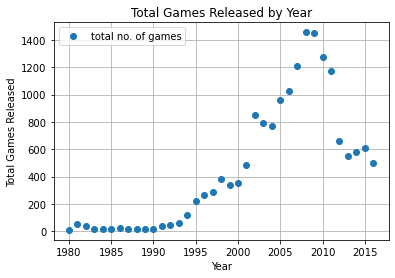

In [45]:
#
data_games_byYear_pvt=data_raw.pivot_table(index='year_of_release', values='name', aggfunc={'name':'count'}).reset_index()
data_games_byYear_pvt.columns=['year','total no. of games']
data_games_byYear_pvt=data_games_byYear_pvt.sort_values(by='year')
ax=data_games_byYear_pvt.plot(title='Total Games Released by Year',x='year',y='total no. of games', grid=True,style='o')
ax.set_xlabel('Year')
ax.set_ylabel('Total Games Released')
plt.show()

#display(data_games_byYear_pvt)

#### Conclusion
Till 1995, sales are very low. May be because till that period video games were not that much popular or they are not available so easily. After that sales starts to increase till the year 2010 rapidly. After that sudden drop in sales and then continue to rise with nominal figure till 2015. In 2016 also sales decrease as compare to 2015.

#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

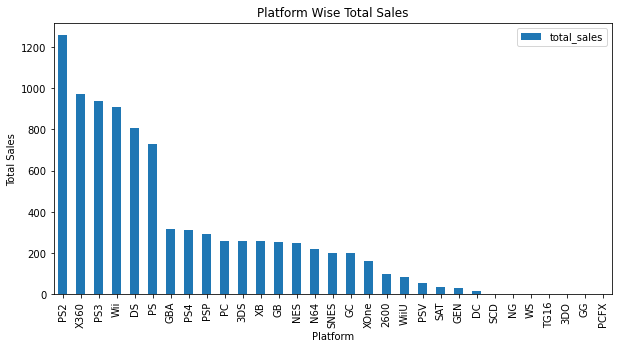

In [46]:
#Showing platform wise total_sales .
data_platform_pvt=data_raw.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
data_platform_pvt.columns=['platform','total_sales']

#saving top 6 platform for which sales are high.
df_topPlatform=data_platform_pvt.sort_values(by='total_sales',ascending=False).head(6)

ax=data_platform_pvt.sort_values(by='total_sales',ascending=False).plot(figsize=(10,5), x='platform',y='total_sales'
                                                                        ,kind='bar', title='Platform Wise Total Sales')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales')
plt.show()


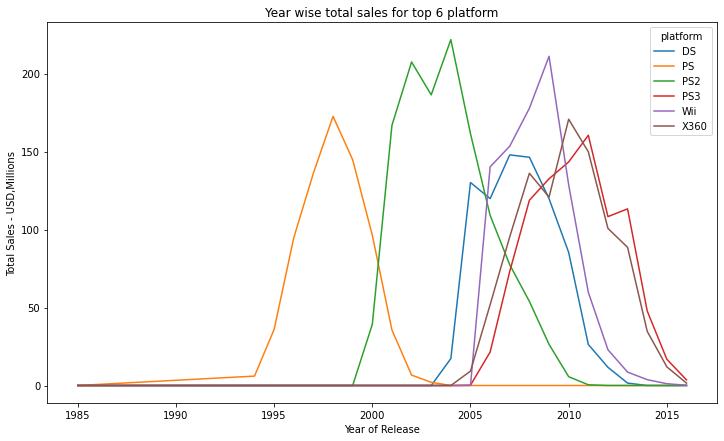

In [47]:
ax=data_raw[data_raw['platform'].isin(df_topPlatform.platform)].pivot_table(
    index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0
).plot(figsize=(12,7), title='Year wise total sales for top 6 platform')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Total Sales - USD,Millions')
    
plt.show()


#### Conclusion
No or minimal sales available before 1995.<br/>
1. 'PS' platform sales starts to increase in 1994 and declined in 2004. Reaches to its highest level in 1997 or 1998 with 160 million dollars sales.
2. 'DS' platform sales starts to increase in 2003 and declined in 2013. Reaches to its highest level in 2006 or 2007 with 140 million dollars sales.
3. 'PS2' platform sales starts to increade in 1999 and declined in 2010. Reaches to its highest level in 2004 with 210 million dollars sales.
4. 'PS3' platform sales starts to increase in 2005 and declined in 2016. Reaches to its highest level in 2011 with 160 millions dollar sales.
5. 'Wii' platform sales starts to increase in 2005 and declined in 2013. Reaches to its highest level in 2010 with 210 million dollars sales.
6. 'X360' platform sales starts to increase in 2004 and declined in 2016. Reaches to its highest level in 2011 with 160 million dollars sales.<br/><br/>
So from the above analysis, I can conclude that first we find top 6 platform based on their sales. After analzing year wise data for each of these platform it shows that normally for each platform now have zero sales. Almost all platform survive for 10 years and it reaches to its maximum sales after 4 or 5 years. After that it starts to decline.


#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017

#### Work only with the data that you've decided is relevant. Disregard the data for previous years

**Filltering the data.**
We take data only after the year 2010 as we concluded before that In General platform needs 5-7 years  to reach to its maximum sales figure so now we will take data from last 5-6 years.


In [48]:
print('Before filter count',data_raw.shape)
#filltering the data. We take data only after the year 2010 as we concluded before that 
#In General platform needs 5-7 years  to reach to its maximum sales figure so now we will take data from last 5-6 years.
data_fil=data_raw[(data_raw['year_of_release']>2010)]
print('After filter count',data_fil.shape)

Before filter count (16710, 12)
After filter count (4079, 12)


#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms

In [49]:
df=data_fil.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0).sort_values(by='year_of_release')
df
#df[['XOne', 'X360', 'WiiU','PS3','PS4','PC','3DS']]

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.55,26.33,35.35,0.45,160.43,0.00,17.86,4.63,59.79,0.00,149.85,0.00
2012,51.76,11.67,23.45,0.00,108.28,0.00,8.04,16.19,22.94,17.56,100.72,0.00
2013,56.60,1.54,13.01,0.00,113.26,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.85,0.00,13.28,0.00,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [50]:
dynamic=df.T-df.T.shift(+1,axis=1)
dynamic
#dynamic[dynamic.index.isin(['XOne', 'X360', 'WiiU','PS3','PS4','PC','3DS'])]

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,NaN,-11.79,4.84,-12.75,-16.07,-12.64
DS,NaN,-14.66,-10.13,-1.54,0.00,0.00
PC,NaN,-11.90,-10.44,0.27,-4.76,-3.27
PS2,NaN,-0.45,0.00,0.00,0.00,0.00
PS3,NaN,-52.15,4.98,-65.50,-30.94,-13.22
PS4,NaN,0.00,25.99,74.01,18.90,-49.65
PSP,NaN,-9.82,-4.66,-3.14,-0.12,-0.12
PSV,NaN,11.56,-5.60,1.57,-5.91,-2.00
Wii,NaN,-36.85,-14.35,-4.84,-2.61,-0.96


Text(96.0, 0.5, 'Platform')

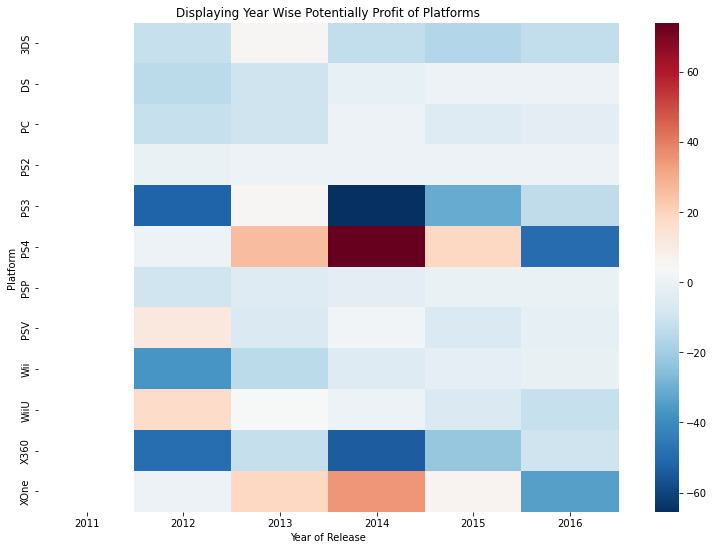

In [51]:
plt.figure(figsize=(13,9))
ax=sns.heatmap(dynamic,cmap='RdBu_r')
ax.set_title('Displaying Year Wise Potentially Profit of Platforms')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Platform')

#### Conclusion

The above graph shows that Potentially Profit of above Platforms. This is shown by the color of each cell against each platform.
1. The white color shows profit is same as of last year. The blue means that platform profit is declining and if the color moves towards red, it shows the platform is more profitable compare to last year.
2. The 3DS, WiiU,PC,PSP Platform sales were decreasing from last some years.
3. The Platform XOne, PS4 platform sales have just started to decrease drastically in 2016 but they come in 2013 so there are chances that they grow again in 2017.
4. **For X360, PS3 decrease density in sales in 2016 is less as compare to previous year while Wii, PSV, PSP sales are also less decreased in comparoson to the previous year but with very nominal value.**
5. PS2, DS are almost finished over the last years.



#### Conclusion:


#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [52]:
data_fil.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60


In [53]:
data_grouped=data_fil[data_fil['year_of_release']>2010].groupby(['platform','name'])['total_sales'].agg('sum').reset_index()
#data_grouped[data_grouped['platform']=='GB']
data_grouped=data_grouped[data_grouped.total_sales>0]
data_grouped

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
4074,XOne,XCOM 2,0.04
4075,XOne,ZombiU,0.01
4076,XOne,Zombie Army Trilogy,0.11
4077,XOne,Zoo Tycoon (2013),0.36


Data is not much presentable. lots of outliers are plotted as the data is grouped by platform and name. Now we will group the data by platform and year and plot the box plot.

In [54]:
data_grouped=data_fil[data_fil['year_of_release']>2010].groupby(['platform','year_of_release'])['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
#data_grouped[data_grouped['platform']=='X360']
data_grouped

,platform,year_of_release,total_sales
0,PS3,2011,160.43
1,X360,2011,149.85
2,PS4,2015,118.90
3,PS3,2013,113.26
4,PS3,2012,108.28
5,X360,2012,100.72
6,PS4,2014,100.00
7,X360,2013,88.58
8,PS4,2016,69.25
9,3DS,2011,63.55


Text(0, 0.5, 'Total Sales - USD,Millions')

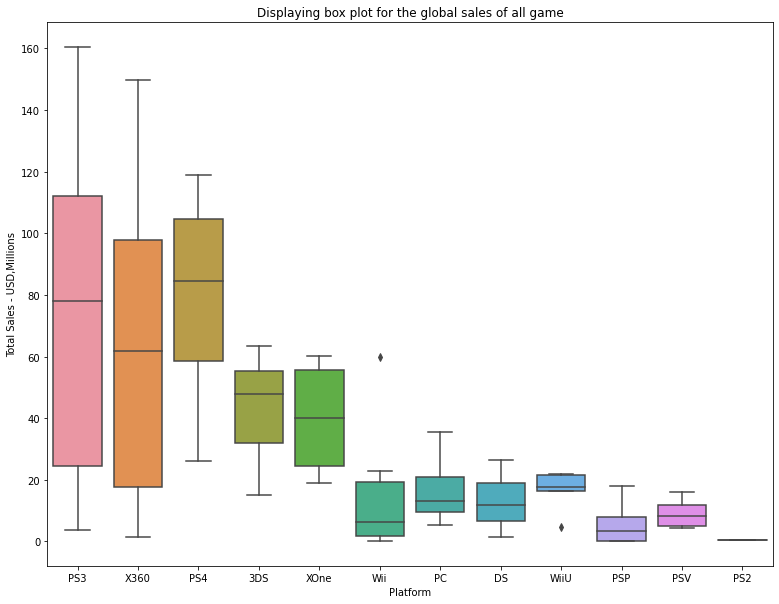

In [55]:
plt.figure(figsize=(13,10))
ax=sns.boxplot(x='platform',y='total_sales',data=data_grouped)
ax.set_title('Displaying box plot for the global sales of all game')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales - USD,Millions')

#### Conclusion

<s>1. The above Boxplot graph display the avg. total sales per year for each platform. From the above graph 'PS4' is the main platform for which median total_sales is also high.</s>
1. The above Boxplot graph display the total sales per year for each platform. The graph above shows that total_sales for 'PS3' is highest among all platform but the median of total_sales is high for 'PS4'.
2. Also there are some outliers. In this case outliers are special game which generate much revenue. So we can check for this kind of game and platform for future purpose.

#### What about average sales on various platforms? 

In [56]:
data_grouped=data_fil[data_fil['year_of_release']>2010].groupby(['platform','year_of_release'])['total_sales'].agg('mean').sort_values(ascending=False).reset_index()
#data_grouped[data_grouped['platform']=='X360']
data_grouped

,platform,year_of_release,total_sales
0,PS4,2013,1.624375
1,PS4,2014,1.333333
2,X360,2013,1.181067
3,XOne,2013,0.997895
4,X360,2012,0.932593
5,PS3,2013,0.891811
6,XOne,2014,0.886393
7,PS4,2015,0.867883
8,XOne,2015,0.751750
9,PS3,2012,0.731622


Text(0, 0.5, 'Total Sales - USD,Millions')

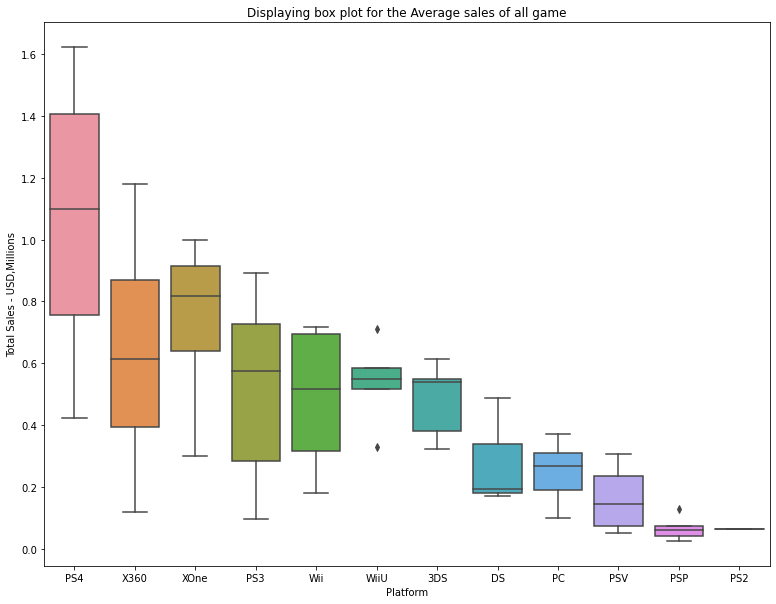

In [57]:
plt.figure(figsize=(13,10))
ax=sns.boxplot(x='platform',y='total_sales',data=data_grouped)
ax.set_title('Displaying box plot for the Average sales of all game')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales - USD,Millions')

If we see the average total_sales of platforms 'PS4' then we find avg. sales is high for PS4 as compare to other platforms.

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions

In [58]:
#finding platform which has largest sales and no. of games compare to other platform.
df=data_fil[data_fil['year_of_release']>2010]
df.groupby('platform').agg({'total_sales':'sum', 'name':'count'}).sort_values(by=['total_sales','name'],ascending=False)
#platform=PS2



,total_sales,name
platform,,
PS3,450.15,720
X360,387.37,516
PS4,314.14,392
3DS,258.68,518
XOne,159.32,247
PC,98.86,397
Wii,96.39,201
WiiU,82.19,147
PSV,54.07,430


<s>From the above table we found that PS2 have highest sales and number of games. So I will analyze this platform.</s><br/>
    From the above table we found that PS3 have highest sales and number of games. So I will analyze this platform.

In [59]:
#data_fil[data_fil['platform']=='PS2']

In [60]:
df_scatter=data_fil[data_fil['platform']=='PS3']
display(df_scatter.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17


In [61]:
df_scatter=df_scatter.dropna()

In [62]:
df_scatter['user_score'].isnull().sum()

0

In [63]:
df_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 16 to 16146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             351 non-null    object 
 1   platform         351 non-null    object 
 2   year_of_release  351 non-null    int32  
 3   genre            351 non-null    object 
 4   na_sales         351 non-null    float64
 5   eu_sales         351 non-null    float64
 6   jp_sales         351 non-null    float64
 7   other_sales      351 non-null    float64
 8   critic_score     351 non-null    float64
 9   user_score       351 non-null    float64
 10  rating           351 non-null    object 
 11  total_sales      351 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 34.3+ KB


In [64]:
df_scatter=df_scatter.sort_values(by='user_score')
df_scatter

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.00,0.01,13.0,1.0,M,0.04
8195,MindJack,PS3,2011,Shooter,0.07,0.07,0.00,0.03,44.0,1.7,M,0.17
7736,UFC Personal Trainer: The Ultimate Fitness System,PS3,2011,Sports,0.08,0.08,0.00,0.03,65.0,2.4,E,0.19
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
9068,Farming Simulator 2013,PS3,2013,Simulation,0.00,0.09,0.02,0.02,40.0,2.9,E,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...
3473,Rayman Legends,PS3,2013,Platform,0.14,0.34,0.00,0.10,91.0,8.7,E10+,0.58
7364,Journey,PS3,2012,Adventure,0.04,0.13,0.00,0.04,92.0,8.8,E,0.21
2520,Devil May Cry HD Collection,PS3,2012,Action,0.42,0.19,0.11,0.09,74.0,8.8,M,0.81
4771,Metal Gear Solid: The Legacy Collection,PS3,2013,Adventure,0.31,0.01,0.03,0.06,93.0,9.0,M,0.41


In [65]:
#creating function which will show scatter plot graph for each user_score and critic_score. 
def relation_sales_review(data,userScore):
    uniquePlat=data['platform'].unique()
    ax=data.plot(kind='scatter', x=userScore, y='total_sales' , style='o',grid=True,figsize=(10, 6),legend=False)# the lower the vehicle age the more price.
    plt.ylabel('total_sales')
    plt.xlabel(userScore)
    plt.title('Relationship between total_sales and '+userScore+' for the platform: '+str(uniquePlat))
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.show()
    print('Pearson correlation coefficient are: ', data[userScore].corr(data['total_sales']))


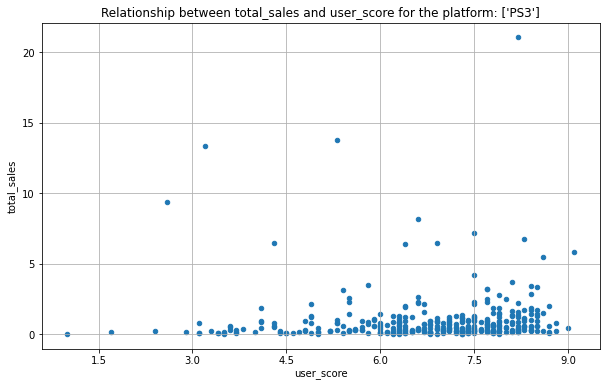

Pearson correlation coefficient are:  0.025828268531333534


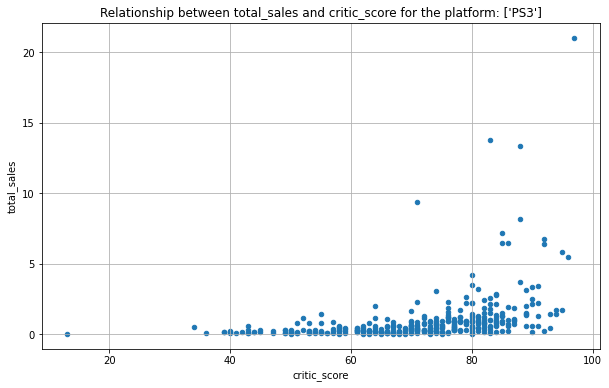

Pearson correlation coefficient are:  0.3803552691641968


In [66]:
#Draw scatter plot for user_score and critic_score.
relation_sales_review(df_scatter,'user_score')
relation_sales_review(df_scatter,'critic_score')

In [67]:
#correlation between critic_score, total_score and total sales. 
df_scatter[['user_score','critic_score','total_sales']].corr()


,user_score,critic_score,total_sales
user_score,1.000000,0.564169,0.025828
critic_score,0.564169,1.000000,0.380355
total_sales,0.025828,0.380355,1.000000


#### Conclusion
1. I choose PS3 platform for the analysis as it got highest no of sales and games. 
2. After analysing, we found there is no relationship between user_score and sales or critic_score and sales.
3. But found some positive relationship between critic_score and user_score.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms

In the above section, I found some platform for which sales have been increased in 2016. So now taking 3 of them for further analysis.

In [68]:
#I am taking here below platform for this task.
topPlatfrm_list=['X360','PS3','Wii']
topPlatfrm_list

['X360', 'PS3', 'Wii']

In [69]:
#warnings.filterwarnings('ignore')
#data_fil.shape
#data_fil['platform'].unique()

In [70]:
data_topGames=data_fil[(data_fil['platform'].isin(topPlatfrm_list)) &
        (data_fil.total_sales>0)].sort_values(by='total_sales',ascending=False)
data_topGames


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16294,Adventure Time: The Secret of the Nameless,X360,2014,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16298,Turbo Trainz,Wii,2012,Racing,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16301,Caladrius,X360,2013,Shooter,0.00,0.00,0.01,0.00,NaN,2.8,T,0.01
16312,Monster High: New Ghoul in School,Wii,2015,Action,0.00,0.01,0.00,0.00,NaN,8.2,E,0.01


In [71]:
def display_scatter_graph_MultiplePlatform(data_full,PlatformList,columnName1,columnName2):
    plt.figure(figsize=(10, 6))
    for pltfrm in PlatformList:
        
        df=data_full[data_full['platform']==pltfrm]
        print('Pearson correlation coefficient between '+columnName1+' and '+columnName2+' for '+pltfrm+': ', 
              df[columnName1].corr(df[columnName2]))
        plt.scatter(x=df[columnName1], y=df[columnName2], marker='o',label=pltfrm)
   
    plt.legend()
    plt.xlabel(columnName1)
    plt.ylabel(columnName2)
    plt.title('Relationship between '+ columnName1+' and '+columnName2+' for Platform(s): '+str(PlatformList))
    plt.show() 
    

Pearson correlation coefficient between user_score and total_sales for X360:  0.038627614891279166
Pearson correlation coefficient between user_score and total_sales for PS3:  0.011442255988103825
Pearson correlation coefficient between user_score and total_sales for Wii:  0.03638032926103723


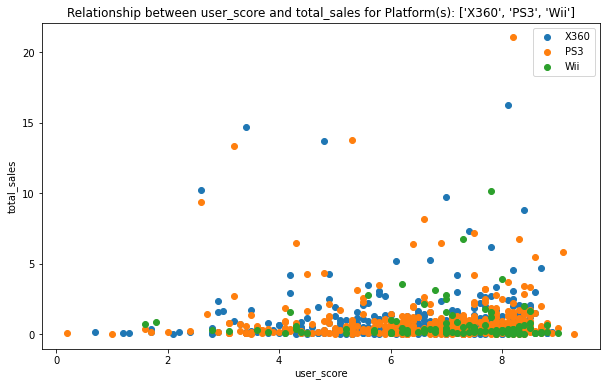

Pearson correlation coefficient between critic_score and total_sales for X360:  0.3955943354698735
Pearson correlation coefficient between critic_score and total_sales for PS3:  0.38201696743327695
Pearson correlation coefficient between critic_score and total_sales for Wii:  0.2987946549177593


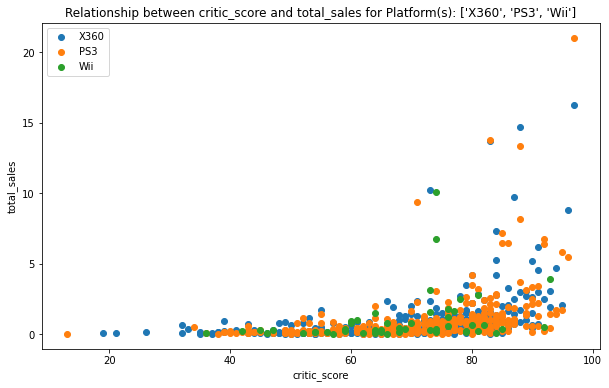

In [72]:
#Displaying Scatter plot for multiple platform. It will show the relationship of platforms's total_sales with user_score, critic_score

display_scatter_graph_MultiplePlatform(data_topGames,topPlatfrm_list,'user_score','total_sales')
display_scatter_graph_MultiplePlatform(data_topGames,topPlatfrm_list,'critic_score','total_sales')

#### Conclusion
1. Found no such relationship between user_score and critic_score with platform(s).<br>
<s>2. PS2: There is as -ve relation found between user_score and total_sales. thats strange.</s><br>
<s>3. Wii: Found +ve relation ship but it's just a single record for this platform.</s>


#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

[Text(0.5, 0, 'Genre'), Text(0, 0.5, 'Total Sales')]

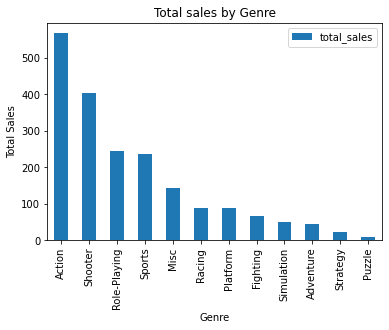

In [73]:
data_fil.pivot_table(
    index='genre',values='total_sales', aggfunc='sum').sort_values(
    by='total_sales',ascending=False).reset_index().plot(kind='bar',
    title='Total sales by Genre',x='genre',y='total_sales'
).set(xlabel='Genre', ylabel='Total Sales')
#display(data_fil_genre)

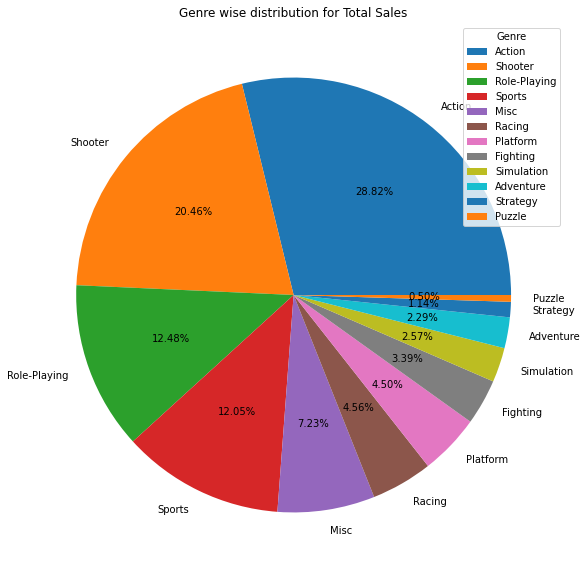

In [74]:
import matplotlib.pyplot as plt
import numpy as np

data_fil_genre=data_fil.pivot_table(
    index='genre',values='total_sales', aggfunc='sum').sort_values(
    by='total_sales',ascending=False).reset_index()
data_fil_genre
plt.figure(figsize=(10, 10))
plt.pie(data_fil_genre['total_sales'], labels = data_fil_genre['genre'],autopct='%.2f%%')
plt.legend(title = "Genre")
plt.title('Genre wise distribution for Total Sales')
plt.show() 

#### Conclusion
1. We can say now main profitable genre are 'Action', 'Sports', 'Shooter' and 'Role-playing'. So we can concentrate on this genre more.

## Step 4. Create a user profile for each region

**For each region (NA, EU, JP), determine:**<br/>
The top five platforms. Describe variations in their market shares from region to region.   

[Text(0.5, 0, 'Platform'), Text(0, 0.5, 'Total Japan Sales')]

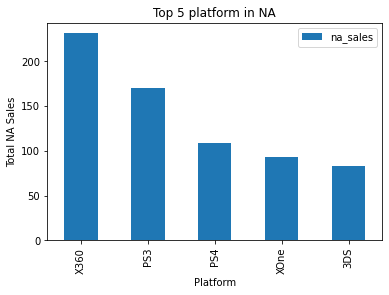

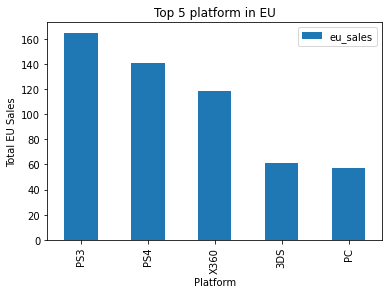

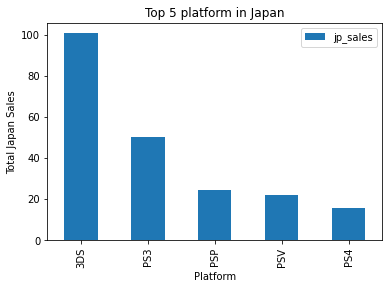

In [75]:
# Top 5 platform for NA Sales
data_NA=data_fil[data_fil['na_sales']>0].pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)
data_EU=data_fil[data_fil['eu_sales']>0].pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)
data_JP=data_fil[data_fil['jp_sales']>0].pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)

data_NA.plot(kind='bar',x='platform',y='na_sales', title='Top 5 platform in NA').set(xlabel='Platform', ylabel='Total NA Sales')
data_EU.plot(kind='bar',x='platform',y='eu_sales', title='Top 5 platform in EU').set(xlabel='Platform', ylabel='Total EU Sales')
data_JP.plot(kind='bar',x='platform',y='jp_sales', title='Top 5 platform in Japan').set(xlabel='Platform', ylabel='Total Japan Sales')

<s>### Conclusion
1. DS, PS2 and PS3 are common in all three region. 
2. In NA, X360 is most popular platform with the total sales amount to approx.600 in USD million
3. In EU, PS2 is most popular with the total sales amount to approx.380 in USD million
4. While in Japan, DS is most popular with the total sales amount to approx.175 in USD million</s>

### Conclusion
1. PS3,PS4,3DS are common in all three region. 
2. In NA, X360 is most popular platform.
3. In EU, PS3 is most popular platform.
4. While in Japan, 3DS is most popular.

#### The top five genres. Explain the difference

In [76]:
def Display_Pie_Graph(data,yparam,lbl,region):
    plt.figure(figsize=(10, 5))
    plt.pie(data[yparam], labels = data[lbl],autopct='%1.0f%%')
    plt.legend(title = str(lbl).upper())
    plt.title(str(lbl).upper()+' wise distribution of sales in '+region)
    plt.show()

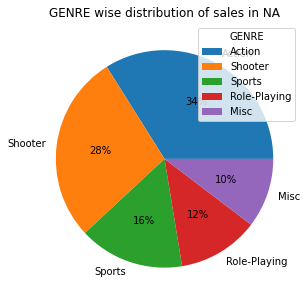

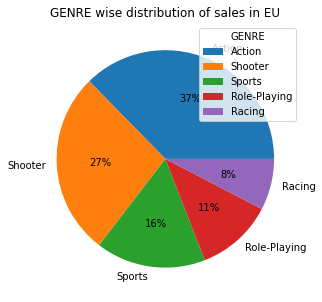

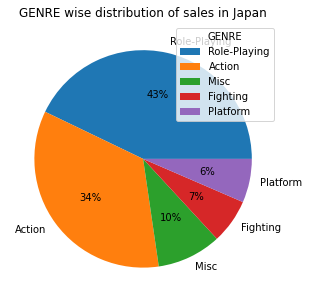

In [77]:
#import matplotlib.pyplot as plt
data_NA=data_fil[data_fil['na_sales']>0].pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)
data_EU=data_fil[data_fil['eu_sales']>0].pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)
data_JP=data_fil[data_fil['jp_sales']>0].pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)
Display_Pie_Graph(data_NA,'na_sales','genre','NA')
Display_Pie_Graph(data_EU,'eu_sales','genre','EU')
Display_Pie_Graph(data_JP,'jp_sales','genre','Japan')

#plt.figure(figsize=(10, 5))
#plt.pie(data_NA['na_sales'], labels = data_NA['genre'],autopct='%1.0f%%')
#plt.legend(title = "Genre")
#plt.title('Genre wise distribution in NA')
#plt.show()

<s>#### Conclusion
1. Action, Sports and Misc are common genre which are amongst the top 5 genre in all region.
2. In NA and EU, Action and Sports are the top 2 genre.
3. While in Japan, Role-Playing is most popular genre.</s>

#### Conclusion
1. Action, Role-Playing are common genre which are amongst the top 5 genre in all 3 region. 
2. In NA and EU, Action and Shooter are the top 2 genre.
3. While in Japan, Role-Playing is most popular genre.

#### Do ESRB ratings affect sales in individual regions?

In [78]:
data_fil.rating.unique()
data_fil.rating.value_counts()
data_fil.info()
#data_fil[data_fil['rating']=='']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4079 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4079 non-null   object 
 1   platform         4079 non-null   object 
 2   year_of_release  4079 non-null   int32  
 3   genre            4079 non-null   object 
 4   na_sales         4079 non-null   float64
 5   eu_sales         4079 non-null   float64
 6   jp_sales         4079 non-null   float64
 7   other_sales      4079 non-null   float64
 8   critic_score     1844 non-null   float64
 9   user_score       2223 non-null   float64
 10  rating           4079 non-null   object 
 11  total_sales      4079 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 398.3+ KB


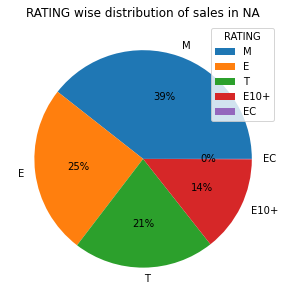

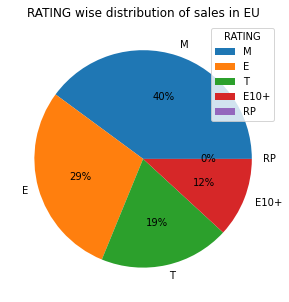

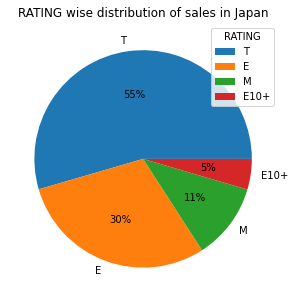

In [79]:
data_NA=data_fil[data_fil['na_sales']>0].pivot_table(index='rating',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)
data_EU=data_fil[data_fil['eu_sales']>0].pivot_table(index='rating',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)
data_JP=data_fil[data_fil['jp_sales']>0].pivot_table(index='rating',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)
Display_Pie_Graph(data_NA,'na_sales','rating','NA')
Display_Pie_Graph(data_EU,'eu_sales','rating','EU')
Display_Pie_Graph(data_JP,'jp_sales','rating','Japan')


<s>#### Conclusion
1. Games with rating 'E' and 'T' are most popular in all of the region.
2. Yes, we can say that ESRB rating affect the sales.</s>

#### Conclusion
1. Games with rating 'E' and 'M' are most popular in NA and EU. While 'T' is mort popular in Japan.
2. Yes, we can say that ESRB rating affect the sales.


So now we can say that :
1. In NA region most perferred game gerne are 'Action' and 'Shooter' on the platform 'X360' with rating as 'M'.
2. In EU region most perferred game gerne are 'Action' and 'Shooter' on the platform 'PS3' with rating as 'M'.
2. In Japan region most perferred game gerne are 'Role-Playing' and 'Action' on the platform '3DS' with rating as 'T'.

## Step 5. Test the following hypotheses:

#### Average user ratings of the Xbox One and PC platforms are the same.

**Null Hypothesis H0:** Average user ratings of the Xbox One and PC platforms are the same<br/>
**Alternative Hypothesis H1:** Average user ratings of the Xbox One and PC platforms are not same.

In [80]:

data_fil['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [81]:
#Test the hypotheses.
from scipy import stats as st
import numpy as np


data_Xbox=data_fil[data_fil['platform'].isin(['XOne'])].dropna()['user_score']
data_PC=data_fil[data_fil['platform']=='PC'].dropna()['user_score']

print('Variance of Xbox platform', data_Xbox.var())
print('Variance of PC Platform',data_PC.var())

alpha = .05 # critical statistical significance level
results = st.ttest_ind(
        data_Xbox, 
        data_PC,equal_var=False)#We pas equal_var as False as the variance of both sample are not equal.
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

print('Avg. user rating of Xbox platform: {0}'.format(data_Xbox.mean()))   
print('Avg. user rating of PC platform: {0}'.format(data_PC.mean()))

Variance of Xbox platform 1.7936433004746257
Variance of PC Platform 2.4939734310581785
p-value:  0.6581986666201556
We can't reject the null hypothesis
Avg. user rating of Xbox platform: 6.545180722891567
Avg. user rating of PC platform: 6.4837837837837835


#### Conclusion
After examine the p-value, We can say that we can't reject the null hypothesis, which implies average user rating from Xbox and PC platform are same.

#### Average user ratings for the Action and Sports genres are different.

**Null Hypothesis H0:** Average user ratings for the Action and Sports genres are same<br/>
**Alternative Hypothesis H1:** Average user ratings for the Action and Sports genres are different.

In [82]:
data_fil['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Racing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [83]:
#Test the hypotheses.
from scipy import stats as st
import numpy as np

data_Action=data_fil[data_fil['genre']=='Action'].dropna()['user_score']
data_Sprt=data_fil[data_fil['genre']=='Sports'].dropna()['user_score']

print('Variance of Action genre', data_Action.var())
print('Variance of Sports genre',data_Sprt.var())

alpha = .05 # critical statistical significance level
results = st.ttest_ind(
        data_Action, 
        data_Sprt,equal_var=False)#We pas equal_var as False as the variance of both sample are not equal.
print('p-value: ', results.pvalue)


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

print('Avg. user rating of Action genre: {0}'.format(data_Action.mean()))   
print('Avg. user rating of Sports genre: {0}'.format(data_Sprt.mean()))

Variance of Action genre 1.6838990259294881
Variance of Sports genre 1.974169636493228
p-value:  2.1702315121293203e-12
We reject the null hypothesis
Avg. user rating of Action genre: 6.833783783783792
Avg. user rating of Sports genre: 5.978260869565219


#### Conclusion
<s>After examine the p-value, We can say that we can't reject the null hypothesis, which implies for the Action and Sports genres are same.</s>

After examine the p-value, We can say that we reject the null hypothesis, which implies for the Action and Sports genres are different.

## Step 6. Write a general conclusion

### General Conclusion

<s>1. These are platform which are still there in market. XOne, X360, WiiU,PS3,PS4,PC,PSV,3DS. Among these 3DS and XOne, PS4 and WiiU are not older than 4 to 5 years. So we can concentrate on these as I analyze that after 4 or 5 years platform reaches to its highest level. Also X360 is older but still surviving in the market so this is also one of the option.
2. While deciding the platform we should also consider the region. As in NA, X360 is most popular while in EU PS2 whereas in Japan DS the most popular platform.
2. User score and critic score does not affect the sales of platform but ESRB rating does.
3. Main profitable genre are 'Action', 'Sports', 'Shooter' and 'Role-playing'. Among these Action and Sports are most popular in NA and EU whereas Role-Playing is most popular in Japan.
4. Games with rating 'E' and 'T' are most popular in all of the region.
5. Average user rating from Xbox and PC platform are same.
6. Average user ratings for the Action and Sports genres are same.</s>

1. PS2, X360, PS3, Wii, DS, PS are the top 6 platform based on total_sales of all platform. Among these PS3, Wii, X360 are the platform which are still active in the market. 
2. After analzing year wise data for each of these platform it shows that normally for each platform now have zero sales. Almost all platform survive for 10 years and it reaches to its maximum sales after 4 or 5 years. After that it starts to decline. So based on this conclusion, I decided to take data after 2010. 
2. So After filtering the data, found these unique platforms 3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne.
3. From these DS, PS2 and PSP are out from the market now.
4. Sales are decreasing for all remaing in 2016. May be economy was not good in that year so gaming industry also face slow down in 2016.
5. The Platform XOne, PS4 platform sales have just started to decrease drastically in 2016 otherwise they are growing. Also i think that as they come in 2013 so there are chances that their sales grow in 2017.
6. Box plot shows that gobal sales are high for PS3, X360, PS4.
7. User score and critic score does not affect the sales of platform but ESRB rating does.
8. Top main profitable genre are 'Action', 'Sports', 'Shooter' and 'Role-playing'. 
9. In NA, X360 is most popular platform. In EU, PS3 and in Japan, 3DS is most popular.
10. In NA and EU, Action and Shooter are the top 2 genre. While in Japan, Role-Playing is most popular genre.
12. Games with rating 'E' and 'M' are most popular in NA and EU. While 'T' is mort popular in Japan.
13. Average user rating from Xbox and PC platform are same.
14. Average user ratings for the Action and Sports genres are different.<br/>


So now from all the above point, I can say that:
Pofit from the sales of games depends upon the region. So company first look the region and then should decide which game is to be launched.
like for example:
In NA region most perferred game gerne are 'Action' and 'Shooter' on the platform 'X360' with rating as 'M'.
In EU region most perferred game gerne are 'Action' and 'Shooter' on the platform 'PS3' with rating as 'M'.
In Japan region most perferred game gerne are 'Role-Playing' and 'Action' on the platform '3DS' with rating as 'T'